In [31]:
import numpy as np
import operator

In [1]:
# open the text file in read mode
with open('10000_topics.txt', 'r') as p:
    # create an empty list to store the data
    data = []
    # iterate over the lines in the file
    for line in p:
        # split the line into a list of substrings based on the ":" character
        items = line.split(':')
        data.append(items[1])

    # print the data list
    print(data[1])

# close the file
p.close()


native american photographs images



In [2]:
# Open the text file in read mode
with open('wordlist.txt', 'r') as f:
  # Create an empty list to store the data
  data1 = []
  # Read each line of the file
  for line in f:
    # Split the line into a list of fields
    fields = line.split()
    # Append the list of fields to the data list
    data1.append(fields)

# Print the data list
print(data1[0])


['00', '474', '7.094408']


In [3]:
len(data1)

517232

In [4]:
term = []
PLL = []

for x in data1:
    a = x[0]
    b = x[1]

    term.append(a)
    PLL.append(b)


In [5]:
PLL[1]

'144'

In [6]:
len(term)

517232

In [83]:
# Define the number of dictionaries and the list of terms
K = 32

# Create a list of dictionaries
dicts = [{} for _ in range(K)]

# Assign the terms to the dictionaries using round robin
for i, (terms, plls) in enumerate(zip(term, PLL)):
    dicts[i % K][terms] = plls

# Print the dictionaries
for i, d in enumerate(dicts):
    print(f"Dictionary {i+1}: {d}")



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [70]:
dicts[0]["00"]

'474'

In [84]:
def process_query(query, dictionaries):
    terms = query.split()
    results = {}
    i=0
    len_dict=len(dictionaries)+1
    all_costs = [0] * len_dict
    for dictionary in dictionaries:
        broker_cost = 0
        node_cost = 0
        total_cost = 0
        valid_terms = []

        for term in terms:
            if term in dictionary:
                valid_terms.append(dictionary[term])
        if len(valid_terms)>0:
            results[i] = (valid_terms)
        i+=1

    # Iterate over the dictionary
    if len(results) > 1:
        for key, value in results.items():
            # Check if the value is a list with more than one element
            if isinstance(value, list) and len(value) > 1:
                # If the value is a list with more than one element, print the minimum value
                broker_cost += int(min(value))
                all_costs[key] += broker_cost
                all_costs[-1] += broker_cost
                # for k in range(len_dict):
                  
            if len(value) == 1:
                # If the value is not a list or has only one element, print the value
                broker_cost += int(value[0])
                all_costs[key] += broker_cost
                all_costs[-1] += broker_cost

    if len(results) == 1:
        # If there is only one key, get the key and value
        key, value = list(results.items())[0]

        # Check if the value is a list
        if isinstance(value, list):
            # Initialize the sum to 0
            value_sum = 0
            # Iterate over the values in the list
            for val in value:
                # Check if the value is an integer
                if isinstance(val, int):
                    # If the value is an integer, add it to the sum
                    value_sum += val
                    all_costs[key] += value_sum
                # Check if the value is a string that can be converted to an integer
                elif val.isdigit():
                    # If the value is a string that can be converted to an integer, add it to the sum
                    value_sum += int(val)
                    all_costs[key] += value_sum
        else:
            # If the value is not a list, print the value
            value_sum = value
            all_costs[key] += value_sum
    return (all_costs)

In [85]:
cost_report = [0] * (K+1)
for items in data:
  new = process_query(items,dicts)
  # print(new)
  cost_report=list(map(operator.add, new, cost_report))
print((cost_report))

[4014923, 3458431, 5567193, 6836900, 107870001, 26647281, 28313014, 25803854, 51372846, 32136151, 38359711, 207706916, 31896008, 46949834, 183124432, 275768283, 82667483, 82380720, 413736621, 179565604, 181254043, 218581447, 128100073, 141327351, 123683368, 182166851, 141298889, 149187678, 155038438, 224927545, 126965262, 149439046, 3748630002]


In [77]:
k = 4
int_list = [eval(i) for i in PLL]
newList = [x / k for x in int_list]
print(newList[0])

new_dict = dict(zip(term, newList))

118.5


In [ ]:
cost_report = [0] * (k+1)
for docs in data:
  new = process_query(docs,dicts)
  # print(new)
  cost_report=list(map(operator.add, new, cost_report))
print((cost_report))

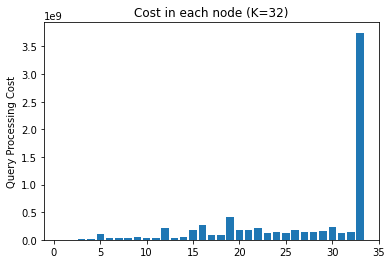

In [88]:
import matplotlib.pyplot as plt


x_values = range(1, 34)

plt.ylabel("Query Processing Cost")
plt.title("Cost in each node (K=32)")

plt.bar(x_values, cost_report)
plt.show()
